In [2]:
import json
import csv
from decimal import *
import datetime
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
file = 'activities.txt'
opened = open(file,encoding='utf-8')
var = opened.read()

216 231 325 0 0 0


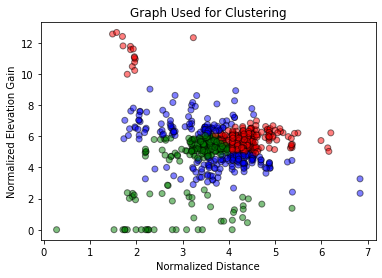

In [14]:
vars_js = json.loads(var)
vars_js_k = []
for each in vars_js:
    if each['start_latitude'] is not None:
        vars_js_k.append({'distance':pow(each['distance']/175,.35),
                          'elevtime':pow((each['total_elevation_gain']/each['moving_time'])*200,.8)})
df = pd.DataFrame(vars_js_k)
kmeans = KMeans(n_clusters=6,random_state=3425)
kmeans.fit(df)
labels = kmeans.predict(df)
df['lab1'] = labels

labels2 = []
colors = []
for each in labels:
    if each==0:
        labels2.append(0)
        colors.append('g')
    if each==1:
        labels2.append(2)
        colors.append('r')
    if each==2:
        labels2.append(2)
        colors.append('r')
    if each==3:
        labels2.append(1)
        colors.append('b')
    if each==4:
        labels2.append(0)
        colors.append('g')
    if each==5:
        labels2.append(1)
        colors.append('b')
df['color'] = colors        
df['label'] = labels2
plt.scatter(df['distance'], df['elevtime'],color = df['color'],alpha=0.5, edgecolor='k')
plt.title("Graph Used for Clustering")
plt.xlabel("Normalized Distance")
plt.ylabel("Normalized Elevation Gain")
#print(len(df[df['label'] == 0]),len(df[df['label'] == 1]),len(df[df['label'] == 2]))
print(len(df[df['label'] == 0]),len(df[df['label'] == 1]),len(df[df['label'] == 2]),len(df[df['label'] == 3]),
      len(df[df['label'] == 4]),len(df[df['label'] == 5]))